In [1]:
from data_utils import *
from sketchrnn import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
dataset = SmoothCurve("data/threecurves.csv")

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


In [3]:
hp.dropout = 0.1
hp.Nz = 2
model1 = SketchRNN_Control()
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)
for i in range(100):
    model1.train(dataloader, i)

/home/artoriamaster_gmail_com/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/home/artoriamaster_gmail_com/Draw_AI/sketchrnn.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pi = F.softmax(pi.transpose(0,1).squeeze()).view(len_out,-1,hp.M)
/home/artoriamaster_gmail_com/Draw_AI/sketchrnn.py:359: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(self.encoder.parameters(), hp.grad_clip)
/home/artoriamaster_gmail_com/Draw_AI/sketchrnn.py:360: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(self.decoder.parameters(), h

Epoch 0 Loss KL 0.10000000149011612 Loss R 2.3107006549835205
Epoch 1 Loss KL 0.10000000149011612 Loss R 2.4840171337127686
Epoch 2 Loss KL 0.10000000149011612 Loss R 2.667710542678833
Epoch 3 Loss KL 0.10000000149011612 Loss R 2.6487746238708496
Epoch 4 Loss KL 0.10000000149011612 Loss R 1.9966814517974854
Epoch 5 Loss KL 0.10000000149011612 Loss R 2.4435946941375732
Epoch 6 Loss KL 0.1028832420706749 Loss R 1.731133222579956
Epoch 7 Loss KL 0.10000000149011612 Loss R 2.144609212875366
Epoch 8 Loss KL 0.10000000149011612 Loss R 2.2514543533325195
Epoch 9 Loss KL 0.10000000149011612 Loss R 2.2962565422058105
Epoch 10 Loss KL 0.10000000149011612 Loss R 1.617090106010437
Epoch 11 Loss KL 0.10000000149011612 Loss R 1.1813687086105347
Epoch 12 Loss KL 0.10000000149011612 Loss R 1.6026744842529297
Epoch 13 Loss KL 0.10000000149011612 Loss R 1.321362018585205
Epoch 14 Loss KL 0.10000000149011612 Loss R 1.1752568483352661
Epoch 15 Loss KL 0.10000000149011612 Loss R 0.9913817644119263
Epoch 16

In [14]:
hp.lr = 0.0005
for i in range(100, 200):
    model1.train(dataloader, i)

Epoch 100 Loss KL 0.10000000149011612 Loss R -1.7627612352371216
Epoch 101 Loss KL 0.10000000149011612 Loss R -2.741323709487915
Epoch 102 Loss KL 0.10000000149011612 Loss R -1.9292547702789307
Epoch 103 Loss KL 0.10000000149011612 Loss R -1.6001540422439575
Epoch 104 Loss KL 0.10000000149011612 Loss R -1.2492530345916748
Epoch 105 Loss KL 0.10000000149011612 Loss R -1.9706072807312012
Epoch 106 Loss KL 0.10000000149011612 Loss R -2.500837564468384
Epoch 107 Loss KL 0.10000000149011612 Loss R -1.885589599609375
Epoch 108 Loss KL 0.10000000149011612 Loss R -1.9514199495315552
Epoch 109 Loss KL 0.10000000149011612 Loss R -2.2747042179107666
Epoch 110 Loss KL 0.10000000149011612 Loss R -2.4725024700164795
Epoch 111 Loss KL 0.10000000149011612 Loss R -1.672156810760498
Epoch 112 Loss KL 0.10000000149011612 Loss R -1.916982650756836
Epoch 113 Loss KL 0.10000000149011612 Loss R -1.7558425664901733
Epoch 114 Loss KL 0.10000000149011612 Loss R -2.1690025329589844
Epoch 115 Loss KL 0.1000000014

Encoded style:  [0. 0. 1.]


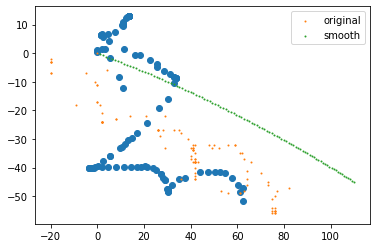

In [25]:
idx = 4000
data, style = dataset[idx]
controldx = data[2, :].copy()
controldy = data[3, :].copy()
inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
labels = torch.FloatTensor(style).cuda().unsqueeze(0)
xs, ys, dx, dy = model1.conditional_generation(inputs, labels)
plt.scatter(xs, ys)
#controlx = np.cumsum(controldx)
#controly = np.cumsum(controldy)
#plt.plot(controlx, controly)
dataset.visualize(idx)
#plt.plot(dx)
#plt.plot(dy)
#dataset.visualize_d(idx)

In [4]:
data, style = dataset[0]
data.shape

(4, 100)

4096


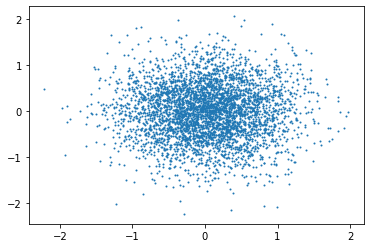

In [27]:
x1 = []
x2 = []
n = 0
m = 0
for i in range(len(dataset)):
    data, style = dataset[i]
    #if style[0] < 0.5:
    #    continue
    n += 1
    inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
    labels = torch.FloatTensor(style).cuda().unsqueeze(0)
    
    model1.encoder.train(False)
    z, mu, sigma_hat = model1.encoder(inputs, labels)
    z = z.squeeze().detach().cpu().numpy()
    x1.append(z[0])
    x2.append(z[1])
print(n)
plt.scatter(x1, x2, s=1)